In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


**ME 592X Assignment - 1**

Question 1
1. Load sudoku_original.png image in grayscale.
2. Plot histogram of intensity.
3. Choose 4 appropriate points and perform Perspective Transformation to obtain the sudoku as a perfect square.

In [ ]:
import os

In [ ]:
import numpy as np
import scipy

x = np.array([1,2,3])
print(x[0].dtype)
print(type(1))

x = np.arange(10)
print(x)


int64
<class 'int'>
[0 1 2 3 4 5 6 7 8 9]


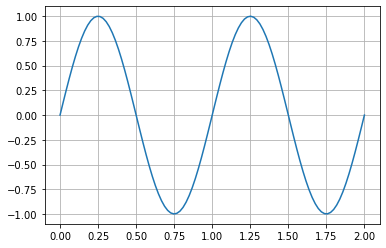

In [ ]:
import matplotlib.pyplot as plt

t = np.linspace(0,2,100)
x = np.sin(2*np.pi*t)

plt.plot(t,x)
plt.grid()
plt.show()

(423, 419)


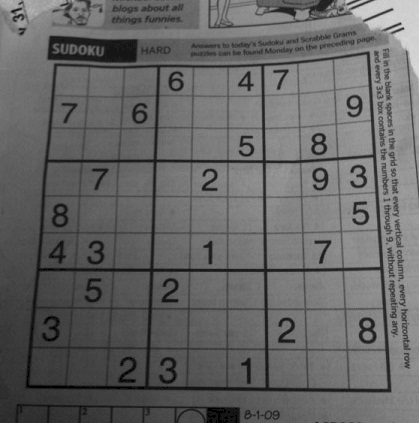

In [ ]:
#Q1. 1 Loading the sudoku-original.png image in grayscale
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/mnt/MyDrive/Colab Notebooks/sudoku-original.png',0)
print(img.shape)
rows, cols = img.shape
cv2_imshow(img)

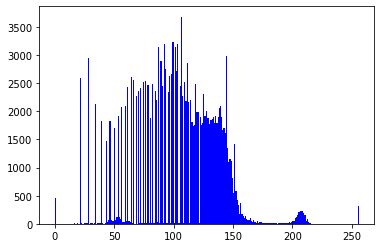

In [ ]:
# Q1. 2 - Plotting the Intensity Histogram
_ = plt.hist(img.flatten(), 256, [0, 256], color = 'b')

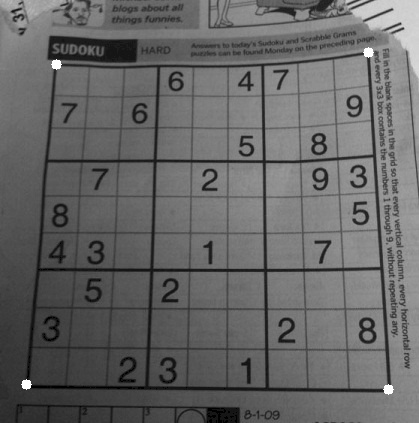

In [ ]:
# Q1. 3 - Identifying the end-points on the actual sudoku to perform perspective transformation
cv2.circle(img, (56, 64), 5, (255, 255, 255), -1)
cv2.circle(img, (368, 52), 5, (255, 255, 255), -1)
cv2.circle(img, (26, 384), 5, (255, 255, 255), -1)
cv2.circle(img, (388, 389), 5, (255, 255, 255), -1)
cv2_imshow(img)


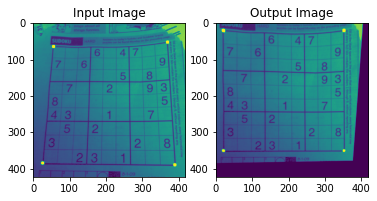

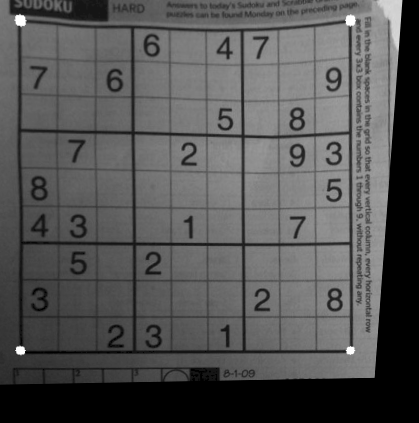

In [ ]:
#Applying perspective transformation on the image on the above highlighted points
p1 = np.float32([[56, 64], [368, 52], [26, 384], [388, 389]])
#Making a square of 330x330 - averaged out value - with a 20 pixel margin
p2 = np.float32([[20,20], [350, 20], [20, 350], [350, 350]])
#Applying perspective transformation
matrix = cv2.getPerspectiveTransform(p1, p2)
new_img = cv2.warpPerspective(img, matrix, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('Input Image')
plt.subplot(122), plt.imshow(new_img), plt.title('Output Image')
plt.show()

cv2_imshow(new_img)
